In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pandas_profiling

# fix the display of Chinese
from pylab import *
mpl.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

In [2]:
res_list = []
for value in range(1, 64, 1):
    '''check the data from api'''
    
    def get_job():
        jobs = res_json['jobs'] # extract the jobs from the dict
        res_list.append(jobs)
    
    if value == 1:
        res = requests.get('https://www.yourator.co/api/v2/jobs?')
        res_json = res.json() #load as json file
        get_job()        
    else:
        res = requests.get('https://www.yourator.co/api/v2/jobs?page=' + str(value))
        res_json = res.json() #load as json file
        get_job()

print('Loading Finished!')

In [4]:
res_list[0]

[{'id': 10329,
  'name': '[Full-time] Impact Program Manager/Supervisor 影響力專案經理/主任（台北）',
  'path': '/companies/ImpactHubTaipei/jobs/10329',
  'category': {'id': 15,
   'name': '產品/專案管理',
   'jobs_count': 771,
   'created_at': '2015-12-22T10:58:22.000+08:00',
   'updated_at': '2017-03-23T02:30:42.000+08:00',
   'position': 13,
   'color': '#0070C4',
   'job_type': 'normal_job',
   'isco_code': '11-3051.00'},
  'tags': [{'id': 8,
    'name': '社會企業',
    'jobs_count': 249,
    'created_at': '2015-11-06T20:29:07.000+08:00',
    'updated_at': '2015-11-06T20:29:07.000+08:00'},
   {'id': 127,
    'name': '共享經濟',
    'jobs_count': 213,
    'created_at': '2016-09-30T01:41:36.000+08:00',
    'updated_at': '2016-09-30T01:41:36.000+08:00'}],
  'skill_tags': [],
  'intern': False,
  'job_type': 'full_time',
  'has_salary_info': True,
  'follow': False,
  'salary': 'NT$ 32,000 - 40,000 (月薪)',
  'country': 'TW',
  'country_name': '台灣',
  'city': '臺北市',
  'company': {'path': '/companies/ImpactHubTaipe

In [2]:
job_list = []

for each_page in res_list:
    for each_job in each_page:
        temp_list = {}
        temp_list['Id'] = each_job['id']
        temp_list['Job_Title'] = each_job['name']
        temp_list['Category'] = each_job['category']['name']
        temp_list['Job_Type'] = each_job['job_type']
        temp_list['Salary'] = each_job['salary']
        temp_list['City'] = each_job['city']
        temp_list['Company'] = each_job['company']['brand']
        
        # loading Tags
#         for tag in len(each_job['tags']):
#             temp_tag = {}
#             temp_tag['']
#             temp_list['tag']
        
        job_list.append(temp_list)
df = pd.DataFrame(job_list)
df.head()

NameError: name 'res_list' is not defined

In [ ]:
df.transpose()

In [15]:
df_profiling = df.profile_report(style={'full_width':True})
df_profiling

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


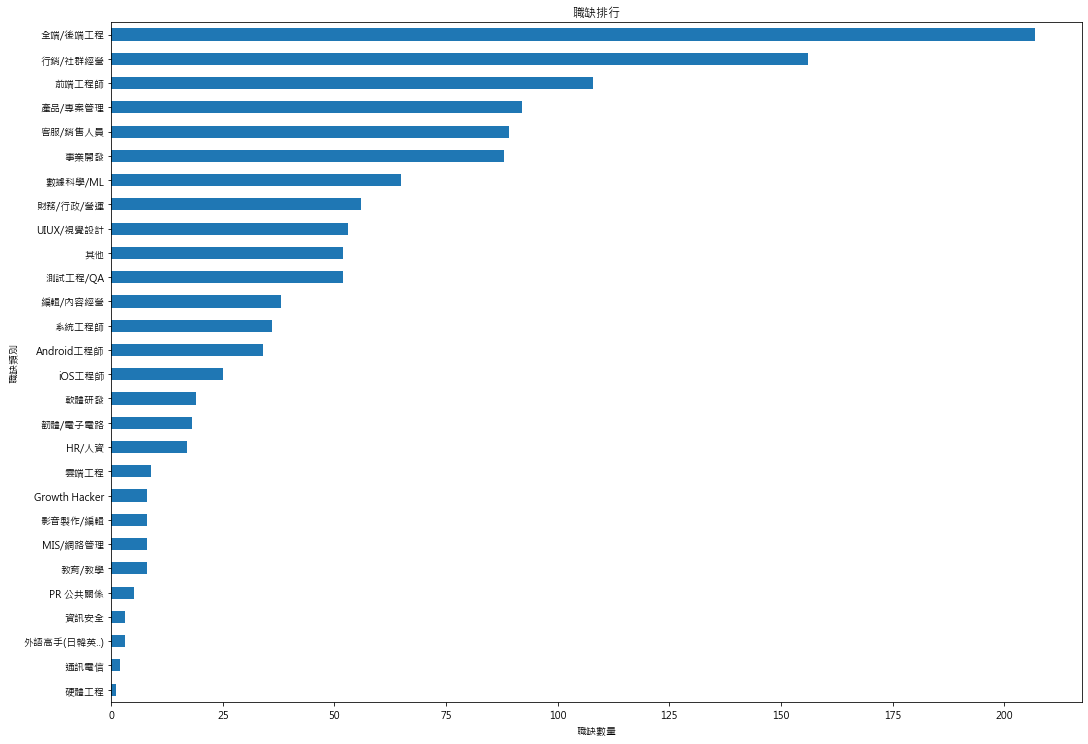

In [6]:
category_list = df.Category.value_counts(ascending=True)
category_list.plot.barh(figsize=(15,10))
plt.tight_layout()
plt.xlabel('職缺數量')
plt.ylabel('職缺類別')
plt.title('職缺排行')
plt.show()

In [12]:
df.Salary.unique()
# deal with the Salary with Top Salary and Bottom Salary

array(['NT$ 32,000 - 40,000 (月薪)', '面議（經常性薪資達4萬元）',
       'NT$ 45,000 - 70,000 (月薪)', 'NT$ 30,000 - 40,000 (月薪)',
       'NT$ 60,000 - 90,000 (月薪)', 'NT$ 30,000 - 35,000 (月薪)',
       'NT$ 42,000 - 60,000 (月薪)', 'NT$ 3,500 - 40,000 (月薪)',
       'NT$ 50,000 - 70,000 (月薪)', 'NT$ 900,000 - 1,400,000 (年薪)',
       'NT$ 800,000 - 1,400,000 (年薪)', 'NT$ 1,300,000 - 1,900,000 (年薪)',
       'NT$ 170 - 170 (時薪)', 'NT$ 13,000 - 16,000 (時薪)',
       'NT$ 1,000,000 - 1,500,000 (年薪)', 'NT$ 35,000 - 45,000 (月薪)',
       'NT$ 160 - 160 (時薪)', 'NT$ 35,000 - 60,000 (月薪)',
       'NT$ 28,000 - 70,000 (月薪)', 'NT$ 500,000 - 800,000 (年薪)',
       'NT$ 800,000 - 1,200,000 (年薪)', 'NT$ 60,000 - 120,000 (月薪)',
       'NT$ 35,000 - 50,000 (月薪)', 'NT$ 40,000 - 70,000 (月薪)',
       'NT$ 80,000 - 160,000 (月薪)', 'NT$ 50,000 - 80,000 (月薪)',
       'NT$ 50,000 - 120,000 (月薪)', 'NT$ 60,000 - 130,000 (月薪)',
       'Negotiable', 'NT$ 32,000 - 36,000 (monthly salary)',
       'NT$ 30,000 - 35,000 (monthly salary)',
    

In [32]:
df['Job_Title'] = df.Job_Title.astype('str')
df['Category'] = df.Category.astype('category')
df['Job_Type'] = df.Job_Type.astype('category')
df['City'] = df.City.astype('category')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
Id           1260 non-null int64
Job_Title    1260 non-null object
Category     1260 non-null category
Job_Type     1260 non-null category
Salary       1260 non-null object
City         1260 non-null category
Company      1260 non-null object
dtypes: category(3), int64(1), object(3)
memory usage: 45.6+ KB
